In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T 

In [2]:
TOTAL_ITERS = 8
v_all, t_all = [], []
for i in range(TOTAL_ITERS):
    v = pd.read_csv("../opentrons/volumes_%d.csv"%i)
    t = pd.read_csv("../opentrons/times_%d.csv"%i)
    v_all.append(v.to_numpy())
    t_all.append(t.to_numpy())

time_df = pd.DataFrame(np.concatenate(t_all), columns=['DT1', 'DT2', 'DT3', 'DT4'])
volume_df = pd.DataFrame(np.concatenate(v_all), columns=['Water', 'HEPES', 'Z2M246I', 'Au', 'Z2'])

In [3]:
time_df.head()

,DT1,DT2,DT3,DT4
0,0,0,0,8
1,0,0,0,0
2,0,0,0,9
3,0,0,0,5
4,0,0,0,11


In [4]:
volume_df.head()

,Water,HEPES,Z2M246I,Au,Z2
0,123,54,87,13,3
1,76,54,87,13,50
2,53,54,87,13,73
3,100,54,87,13,26
4,88,54,87,13,38


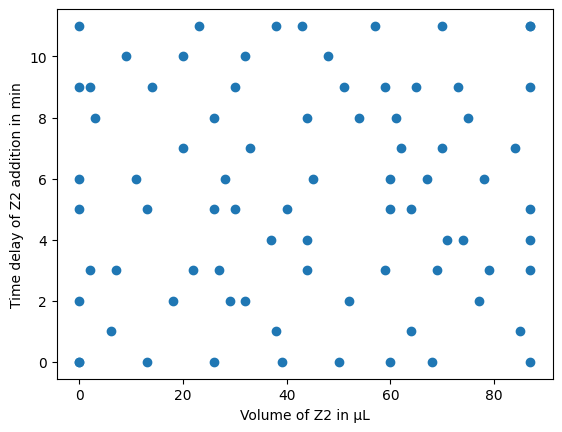

In [5]:
fig, ax = plt.subplots()
ax.scatter(volume_df["Z2"], time_df["DT4"])
ax.set_xlabel("Volume of Z2 in µL")
ax.set_ylabel("Time delay of Z2 addition in min")
plt.show()

In [6]:
# save the volume time into csv files
volume_df.to_csv('./volumes_repeat_071724.csv',index=False)
time_df.to_csv('./times_repeat_071724.csv',index=False)

In [10]:
# create a direction array to run the synthesis with OTTO
water_vol = np.array([280,0,0,0,0])
water_time = np.array([0,0,0,0])
v_array = np.vstack((volume_df.to_numpy(), water_vol))
t_array = np.vstack((time_df.to_numpy(), water_time))
o_array = np.tile(np.array([1,2,3,4,5]), (v_array.shape[0], 1))
print("Total volumes required :", v_array.sum(axis=0))
print("Total number of samples : ", v_array.shape[0])

Total volumes required : [6871 4320 6960 1040 3489]
Total number of samples :  81


In [8]:
from otto import Create_Directions as CD

direction_array = CD.create_directions(v_array, t_array, o_array)
np.save('./directions_repeat_071724.npy', direction_array)